In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import shapiro, normaltest
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# for ensemble method use
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#TO DO-
#One-R
# sampling SOMTE


# height removed
Test_Target = ["SUSPECT_ARRESTED_FLAG", "STOP_WAS_INITIATED",
                 "OBSERVED_DURATION_MINUTES", "SUSPECTED_CRIME_DESCRIPTION",
                 "STOP_DURATION_MINUTES", "FIREARM_FLAG",
                 "SUSPECT_RACE_DESCRIPTION",
                 "DEMEANOR_OF_PERSON_STOPPED", "SUSPECT_BODY_BUILD_TYPE","FRISKED_FLAG","SEARCHED_FLAG","STOP_LOCATION_BORO_NAME"]
Test1 = pd.read_excel("sqf2022.xlsx", usecols=Test_Target)


In [2]:
Test1["DEMEANOR_OF_PERSON_STOPPED"].isnull().sum()
# check if null value are labeled as arrested or not
# if corealated with any other feature

1907

In [3]:
Test1["DEMEANOR_OF_PERSON_STOPPED"] = Test1["DEMEANOR_OF_PERSON_STOPPED"].fillna(value='neutral')
print(len(Test1["DEMEANOR_OF_PERSON_STOPPED"]))
#Test1['DEMEANOR_OF_PERSON_STOPPED'].applymap(lambda x: x.lower())


15102


In [4]:
analyzer = SentimentIntensityAnalyzer()
dataa = Test1['DEMEANOR_OF_PERSON_STOPPED'].tolist()
data = [ analyzer.polarity_scores(element)['compound'] for element in dataa]

In [5]:
new=[]
for pair in data:
    new.append(pair)

#append the 'new' list back to original df
Test1['SENTIMENT_SCORE'] = new

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the column
Test1['SENTIMENT_SCORE'] = scaler.fit_transform(Test1[['SENTIMENT_SCORE']])

In [6]:
Test1.columns

Index(['STOP_WAS_INITIATED', 'OBSERVED_DURATION_MINUTES',
       'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES',
       'SUSPECT_ARRESTED_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG',
       'FIREARM_FLAG', 'DEMEANOR_OF_PERSON_STOPPED',
       'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_BODY_BUILD_TYPE',
       'STOP_LOCATION_BORO_NAME', 'SENTIMENT_SCORE'],
      dtype='object')

In [7]:
Test1

,STOP_WAS_INITIATED,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,SEARCHED_FLAG,FIREARM_FLAG,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_RACE_DESCRIPTION,SUSPECT_BODY_BUILD_TYPE,STOP_LOCATION_BORO_NAME,SENTIMENT_SCORE
0,Based on Self Initiated,1,CPW,4,Y,Y,Y,Y,FLED ON FOOT,BLACK,U,BROOKLYN,0.500637
1,Based on Self Initiated,1,CPW,1,Y,Y,Y,Y,neutral,BLACK,MED,BRONX,0.500637
2,Based on Self Initiated,1,CPW,1,Y,N,Y,Y,NERVOUS CHANGING DIRECTION FROM OFFICERS RUNNING,BLACK,THN,BRONX,0.342462
3,Based on Radio Run,5,ASSAULT,10,N,N,N,(null),CALM,BLACK HISPANIC,(null),MANHATTAN,0.684866
4,Based on Radio Run,5,ASSAULT,10,N,N,N,(null),CALM,WHITE,(null),MANHATTAN,0.684866
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,Based on Self Initiated,1,CPW,7,N,Y,N,(null),neutral,BLACK,HEA,BRONX,0.500637
15098,Based on Radio Run,0,CPW,1,N,Y,N,(null),CALM,WHITE HISPANIC,U,BRONX,0.684866
15099,Based on Self Initiated,1,CRIMINAL TRESPASS,2,N,N,N,(null),COMPLIANT,WHITE HISPANIC,THN,QUEENS,0.500637
15100,Based on Radio Run,1,CPW,1,N,Y,N,(null),ANNOYED,BLACK,THN,BRONX,0.279585


In [8]:
Feature_test=["FIREARM_FLAG","FRISKED_FLAG","SEARCHED_FLAG"]

Test1['FIREARM_FLAG'] = Test1['FIREARM_FLAG'].replace('(null)', 'No')
Test1.replace('(null)', np.nan, inplace=True)

lb = LabelBinarizer()
Test1["SUSPECT_ARRESTED_FLAG"] = lb.fit_transform(Test1["SUSPECT_ARRESTED_FLAG"])
Test1["FIREARM_FLAG"] = lb.fit_transform(Test1["FIREARM_FLAG"])
Test1["FRISKED_FLAG"] = lb.fit_transform(Test1["FRISKED_FLAG"])
Test1["SEARCHED_FLAG"] = lb.fit_transform(Test1["SEARCHED_FLAG"])


Test1["SUSPECT_ARRESTED_FLAG"].fillna(Test1["SUSPECT_ARRESTED_FLAG"].median,inplace=True)
Test1["FIREARM_FLAG"].fillna(Test1["FIREARM_FLAG"].median,inplace=True)
Test1["FRISKED_FLAG"].fillna(Test1["FRISKED_FLAG"].median,inplace=True)
Test1["SEARCHED_FLAG"].fillna(Test1["SEARCHED_FLAG"].median,inplace=True)

In [9]:
#One Hot-Encoding
OneHot_Encode_feature = ["STOP_WAS_INITIATED","SUSPECTED_CRIME_DESCRIPTION"]
Label_En = OneHotEncoder(handle_unknown="ignore")
Feature_Encoded = Label_En.fit_transform(Test1[OneHot_Encode_feature])
Label_df = pd.DataFrame(Feature_Encoded.toarray(), columns=Label_En.get_feature_names_out(OneHot_Encode_feature))


In [10]:
#label encoding
LE=LabelEncoder()
Test1['SUSPECT_BODY_BUILD_TYPE']=LE.fit_transform(Test1["SUSPECT_BODY_BUILD_TYPE"])
Test1['SUSPECT_BODY_BUILD_TYPE'].fillna(Test1['SUSPECT_BODY_BUILD_TYPE'].mean, inplace=True)

In [11]:
cat_feature=list(Label_df.columns)+Feature_test
Test1 = pd.concat([Test1, Label_df], axis=1)
# drop the original categorical feature column
Test1 = Test1.drop(columns=OneHot_Encode_feature)



# train test split
train_data,test_data=train_test_split(Test1,test_size=0.2,random_state=42)


#classi
X_train = train_data[cat_feature] # training features_for Random forest
y_train = train_data['SUSPECT_ARRESTED_FLAG'] # training target variable for random forest

X_test = test_data[cat_feature] # testing features
y_test = test_data['SUSPECT_ARRESTED_FLAG'] # testing target variable


smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [12]:
nd_test = Test1['SENTIMENT_SCORE']

In [13]:
# Shapiro-Wilk test
_, shapiro_pvalue = shapiro(nd_test)
is_normal_sw = shapiro_pvalue > 0.05

# D'Agostino's K^2 test
_, dagostino_pvalue = normaltest(nd_test)
is_normal_dg = dagostino_pvalue > 0.05

print("Shapiro-Wilk p-value:", shapiro_pvalue)
print("D'Agostino's K^2 p-value:", dagostino_pvalue)
print("Is the data normally distributed (Shapiro-Wilk):", is_normal_sw)
print("Is the data normally distributed (D'Agostino's K^2):", is_normal_dg)


Shapiro-Wilk p-value: 0.0
D'Agostino's K^2 p-value: 0.0
Is the data normally distributed (Shapiro-Wilk): False
Is the data normally distributed (D'Agostino's K^2): False


/Users/iris/Library/Python/3.9/lib/python/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


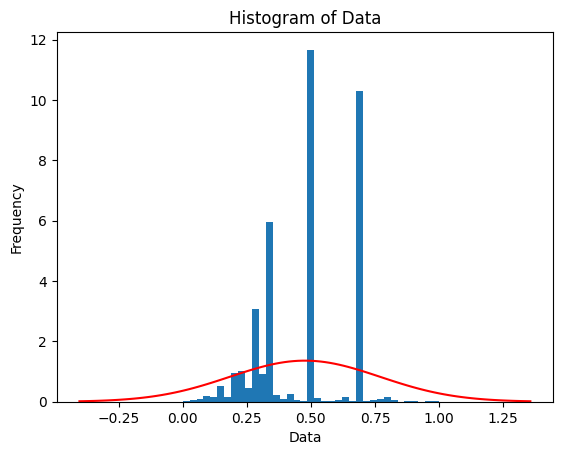

In [14]:
# Create a histogram
plt.hist(nd_test, bins='auto', density=True)

# Plot a normal distribution curve
mu, sigma = np.mean(nd_test), np.std(data)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r')

# Display the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


In [15]:
Test1['SENTIMENT_SCORE']

0        0.500637
1        0.500637
2        0.342462
3        0.684866
4        0.684866
           ...   
15097    0.500637
15098    0.684866
15099    0.500637
15100    0.279585
15101    0.279585
Name: SENTIMENT_SCORE, Length: 15102, dtype: float64

In [16]:
# naive bayesian model

Model_N=MultinomialNB()
Model_N.fit(X_train,y_train)
N_prediction=Model_N.predict(X_test)
train_N_prediction=Model_N.predict(X_train)
N_train_accuracy=accuracy_score(y_train,train_N_prediction)
N_accuracy=accuracy_score(y_test,N_prediction)

print('Train_Accuracy:', N_accuracy)
print('Accuracy:', N_train_accuracy)


Train_Accuracy: 0.8391261171797418
Accuracy: 0.8370168032447645


In [17]:
# naive bayesian with oversample

Model_N_Over = MultinomialNB()
Model_N_Over.fit(X_train_oversampled, y_train_oversampled)
N_prediction_Over = Model_N_Over.predict(X_test)
train_N_prediction_Over = Model_N_Over.predict(X_train_oversampled)
N_train_accuracy_Over = accuracy_score(y_train_oversampled, train_N_prediction_Over)
N_accuracy_Over = accuracy_score(y_test, N_prediction_Over)

print('Train_Accuracy:', N_train_accuracy_Over)
print('Accuracy:', N_accuracy_Over)

Train_Accuracy: 0.7975349931871671
Accuracy: 0.7954319761668321


In [18]:
model_R = RandomForestClassifier(random_state=42)
#model_R.fit(train_data[Feature_test], train_data["SUSPECT_ARRESTED_FLAG"])

#with only caterogical data but transform to numeric/ with both

model_R.fit(X_train,y_train)
Prediction=model_R.predict(X_test)

train_Prediction =model_R.predict(X_train)


train_accuracy=accuracy_score(y_train,train_Prediction)

accuracy = accuracy_score(y_test, Prediction)


print('Train_Accuracy:', train_accuracy)
print('Accuracy:', accuracy)


Train_Accuracy: 0.8673950831884778
Accuracy: 0.8679245283018868


In [19]:
# random classifier with oversampled data

model_R_Over = RandomForestClassifier(random_state=42)
#model_R.fit(train_data[Feature_test], train_data["SUSPECT_ARRESTED_FLAG"])

#with only caterogical data but transform to numeric/ with both
model_R_Over.fit(X_train_oversampled,y_train_oversampled)
Prediction_Over=model_R_Over.predict(X_test)

train_Prediction_Over =model_R_Over.predict(X_train_oversampled)


train_accuracy_Over=accuracy_score(y_train_oversampled,train_Prediction_Over)

accuracy_Over = accuracy_score(y_test, Prediction_Over)


print('Train_Accuracy:', train_accuracy_Over)
print('Accuracy:', accuracy_Over)


Train_Accuracy: 0.8435525826830175
Accuracy: 0.8603111552466071


In [20]:
# linear regression 
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing and training data, and calculate RMSE
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

print('Testing RMSE:', test_rmse)
print('Training RMSE:', train_rmse)

Testing RMSE: 0.34074823315784813
Training RMSE: 0.34556613691542354


In [21]:
logreg = LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(X_train, y_train)
log_predict=logreg.predict(X_test)
log_score=accuracy_score(y_test,log_predict)

train_log_predict=logreg.predict(X_train)
train_log_score=accuracy_score(y_train,train_log_predict)

print("Accuracy:", log_score)
print("Train Accuract:", train_log_score)

Accuracy: 0.8659384309831182
Train Accuract: 0.8611042132273818


In [22]:
# logistic regression with over sampling

logreg_Over = LogisticRegression(max_iter=1000, random_state=42)
logreg_Over.fit(X_train_oversampled, y_train_oversampled)
log_predict_Over = logreg_Over.predict(X_test)
log_score_Over = accuracy_score(y_test, log_predict_Over)

train_log_predict_Over = logreg_Over.predict(X_train_oversampled)
train_log_score_Over = accuracy_score(y_train_oversampled, train_log_predict_Over)

print("Accuracy:", log_score_Over)
print("Train Accuracy:", train_log_score_Over)

Accuracy: 0.8642833498841443
Train Accuracy: 0.8378545769850118


In [23]:
# decision tree

Dec_model=DecisionTreeClassifier(random_state=42)
Dec_model.fit(X_train,y_train)
Dec_predict=Dec_model.predict(X_test)
Train_Dec_predict=Dec_model.predict(X_train)
Dec_accuracy=accuracy_score(y_test,Dec_predict)
Train_Dec_accuracy=accuracy_score(y_train,Train_Dec_predict)
print("Decision Tree score: ",Dec_accuracy)
print("Train_Decision Tree score: ",Train_Dec_accuracy)

Decision Tree score:  0.8652763985435287
Train_Decision Tree score:  0.8673950831884778


In [24]:
#decision tree with over sampling

Dec_model_Over=DecisionTreeClassifier(random_state=42)
Dec_model_Over.fit(X_train_oversampled,y_train_oversampled)
Dec_predict_Over=Dec_model_Over.predict(X_test)
Train_Dec_predict_Over=Dec_model_Over.predict(X_train_oversampled)
Dec_accuracy_Over=accuracy_score(y_test,Train_Dec_predict_Over)
Train_Dec_accuracy_Over=accuracy_score(y_train_oversampled,Train_Dec_predict_Over)
print("Decision Tree score: ",Dec_accuracy_Over)
print("Train_Decision Tree score: ",Train_Dec_accuracy_Over)


ValueError: Found input variables with inconsistent numbers of samples: [3021, 16146]

In [25]:
dummy_class = DummyClassifier(strategy="most_frequent")
dummy_class.fit(X_train,y_train)
y_predict=dummy_class.predict(X_test)
y_train_predict=dummy_class.predict(X_train)
Dummy_accuracy = accuracy_score(y_test, y_predict)
Dummy_train_accuracy = accuracy_score(y_train, y_train_predict)
print("Training error",Dummy_accuracy)
print("TestError:", Dummy_train_accuracy)


Training error 0.6765971532605097
TestError: 0.6682393841569406


In [26]:
Dec_model_OneR=DecisionTreeClassifier(random_state=42,max_depth=1)
Dec_model_OneR.fit(train_data["SEARCHED_FLAG"].values.reshape(-1, 1), train_data["SUSPECT_ARRESTED_FLAG"])
predictions = Dec_model_OneR.predict(test_data["SEARCHED_FLAG"].values.reshape(-1, 1))
accuracy_OneR = accuracy_score(test_data["SUSPECT_ARRESTED_FLAG"], predictions)
print("Accuracy:", accuracy_OneR)

Accuracy: 0.7871565706719629


In [27]:
estimators=[("logreg", logreg), ("rf", model_R), ("Dc", Dec_model),("Naive",Model_N)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
#test our model on the test data
print("Voting Classifier",ensemble.score(X_test, y_test))

Voting Classifier 0.8682555445216815


In [28]:
G_Model=GradientBoostingClassifier(random_state=42) #look for the base alg !! Gradient Boosted Decision Trees?
G_Model.fit(X_train,y_train)
G_predict=G_Model.predict(X_test)
G_predict_train=G_Model.predict(X_train)
G_accracy=accuracy_score(y_test,G_predict)
G_accracy_train=accuracy_score(y_train,G_predict_train)
print("Gradient ", G_accracy)
print("Train Gradient ", G_accracy_train)

Gradient  0.8702416418404502
Train Gradient  0.8659879149077063


In [29]:
models = [RandomForestClassifier(random_state=42),RandomForestClassifier(random_state=42),
            LogisticRegression(random_state=0,max_iter=1000),DecisionTreeClassifier(random_state=42),MultinomialNB()
         ]
for model in models:
    print(model, '\n')
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
    print('Cross-Validation Accuracy:', round(score*100, 4), '\n', '\n')

RandomForestClassifier(random_state=42) 

Cross-Validation Accuracy: 86.2098 
 

RandomForestClassifier(random_state=42) 

Cross-Validation Accuracy: 86.2098 
 

LogisticRegression(max_iter=1000, random_state=0) 

Cross-Validation Accuracy: 86.1435 
 

DecisionTreeClassifier(random_state=42) 

Cross-Validation Accuracy: 86.0939 
 

MultinomialNB() 

Cross-Validation Accuracy: 83.3623 
 

